In [10]:
import json
import pandas as pd
import seaborn as sns

In [2]:
all_tweets = pd.read_json("data/baby_formula.json")

In [53]:
all_tweets_sample = all_tweets.sample(500)
all_tweets_sample

,id,text,author_id,created_at,public_metrics,entities,author,withheld
335017,1525139072884219904,@Jim_Jordan While Americans needs Baby Formula...,903439126736732160,2022-05-13 15:41:05+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 11, 'usernam...","{'username': 'PrerunnerPilot', 'verified': Fal...",NaN
313439,1525206832209399808,@durbinwatson09 @Stockanalysis11 @TomiLahren L...,1474200923979321344,2022-05-13 20:10:20+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 165, 'end': 188, 'url': 'h...","{'username': 'MarketJunkie73', 'name': 'Garric...",NaN
546939,1519755456666812416,"Due to #TigraySiege, lactating women are unabl...",1457000608423100416,2022-04-28 19:08:31+00:00,"{'retweet_count': 55, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 7, 'end': 19, 'tag': '...","{'username': 'Genibelay3', 'public_metrics': {...",NaN
410715,1524806516167122944,@RepMTG Where are you getting this info that “...,1918429483,2022-05-12 17:39:37+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 7, 'username...","{'verified': False, 'name': 'Eric', 'public_me...",NaN
543679,1520912983051980800,https://t.co/qBLl0nFFgv,1727008657,2022-05-01 23:48:07+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 0, 'end': 23, 'url': 'http...","{'name': '#primalscreamgrammy', 'id': '1727008...",NaN
...,...,...,...,...,...,...,...,...
478401,1524360230892707840,Nationwide about 40% of large retail stores ar...,761024878396878848,2022-05-11 12:06:14+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'urls': [{'start': 88, 'end': 111, 'url': 'ht...","{'username': 'Nor_Kan_1965', 'name': 'Mark Dor...",NaN
414985,1524794481308057600,Don't you mean withholds Baby formula. https:/...,1456283604359725056,2022-05-12 16:51:48+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 39, 'end': 62, 'url': 'htt...","{'username': 'briangoth151', 'verified': False...",NaN
102887,1527234504259141632,@seanhannity Only 12 House Republicans voted F...,24568381,2022-05-19 10:27:35+00:00,"{'retweet_count': 0, 'reply_count': 1, 'like_c...","{'mentions': [{'start': 0, 'end': 12, 'usernam...","{'username': 'FLSwampBoy', 'verified': False, ...",NaN
288676,1525294672104390656,@SenSchumer Most Americans will remember the p...,1112659779380346880,2022-05-14 01:59:23+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 11, 'usernam...","{'id': '1112659779380346880', 'username': 'kob...",NaN


### Cleaning Text

In [54]:
import re

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text_basic(text):
    '''
    Normalizes text, removes unicode chars
        Params:
            text (string): text to be normalized
        Returns:
            cleaned_text (string): The text cleaned with the steps above
    '''
    # regular expression from https://monkeylearn.com/blog/text-cleaning/
    cleaned_text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

def clean_text_level2(text):
    '''
    Cleans with the basic steps but also removes stop words and lemmatizes
        Params:
            text (string): text to be normalized
        Returns:
            cleaned_text (string): The text cleaned with the steps above
    '''
    text = clean_text_basic(text)
    stoppies = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    # expression partially from https://monkeylearn.com/blog/text-cleaning/
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in (stoppies)])
    return cleaned_text


[nltk_data] Downloading package stopwords to /home/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/rohan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
all_tweets_sample["clean_text"] = all_tweets_sample["text"].apply(clean_text_basic)
all_tweets_sample["very_clean_text"] = all_tweets_sample["text"].apply(clean_text_level2)
all_tweets_sample

,id,text,author_id,created_at,public_metrics,entities,author,withheld,clean_text,very_clean_text
335017,1525139072884219904,@Jim_Jordan While Americans needs Baby Formula...,903439126736732160,2022-05-13 15:41:05+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 11, 'usernam...","{'username': 'PrerunnerPilot', 'verified': Fal...",NaN,jimjordan while americans needs baby formula b...,jimjordan american need baby formula biden amp...
313439,1525206832209399808,@durbinwatson09 @Stockanalysis11 @TomiLahren L...,1474200923979321344,2022-05-13 20:10:20+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 165, 'end': 188, 'url': 'h...","{'username': 'MarketJunkie73', 'name': 'Garric...",NaN,durbinwatson09 stockanalysis11 tomilahren lol ...,durbinwatson09 stockanalysis11 tomilahren lol ...
546939,1519755456666812416,"Due to #TigraySiege, lactating women are unabl...",1457000608423100416,2022-04-28 19:08:31+00:00,"{'retweet_count': 55, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 7, 'end': 19, 'tag': '...","{'username': 'Genibelay3', 'public_metrics': {...",NaN,due to tigraysiege lactating women are unable ...,due tigraysiege lactating woman unable breastf...
410715,1524806516167122944,@RepMTG Where are you getting this info that “...,1918429483,2022-05-12 17:39:37+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 7, 'username...","{'verified': False, 'name': 'Eric', 'public_me...",NaN,repmtg where are you getting this info that pa...,repmtg getting info pallet baby formula going ...
543679,1520912983051980800,https://t.co/qBLl0nFFgv,1727008657,2022-05-01 23:48:07+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 0, 'end': 23, 'url': 'http...","{'name': '#primalscreamgrammy', 'id': '1727008...",NaN,,
...,...,...,...,...,...,...,...,...,...,...
478401,1524360230892707840,Nationwide about 40% of large retail stores ar...,761024878396878848,2022-05-11 12:06:14+00:00,"{'retweet_count': 1, 'reply_count': 0, 'like_c...","{'urls': [{'start': 88, 'end': 111, 'url': 'ht...","{'username': 'Nor_Kan_1965', 'name': 'Mark Dor...",NaN,nationwide about 40 of large retail stores are...,nationwide 40 large retail store stock 31 mida...
414985,1524794481308057600,Don't you mean withholds Baby formula. https:/...,1456283604359725056,2022-05-12 16:51:48+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 39, 'end': 62, 'url': 'htt...","{'username': 'briangoth151', 'verified': False...",NaN,dont you mean withholds baby formula,dont mean withholds baby formula
102887,1527234504259141632,@seanhannity Only 12 House Republicans voted F...,24568381,2022-05-19 10:27:35+00:00,"{'retweet_count': 0, 'reply_count': 1, 'like_c...","{'mentions': [{'start': 0, 'end': 12, 'usernam...","{'username': 'FLSwampBoy', 'verified': False, ...",NaN,seanhannity only 12 house republicans voted fo...,seanhannity 12 house republican voted bill wou...
288676,1525294672104390656,@SenSchumer Most Americans will remember the p...,1112659779380346880,2022-05-14 01:59:23+00:00,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 11, 'usernam...","{'id': '1112659779380346880', 'username': 'kob...",NaN,senschumer most americans will remember the pr...,senschumer american remember price gas food la...


### Sentiment Analyzers

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    '''
    Gets the sentiment score of text from the nltk sentiment thingy.
        Params:
            text (string): Text to analyze
        Returns:
            sent (float): Real number from -1 to 1
    '''
    return sia.polarity_scores(text)["compound"]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rohan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [57]:
all_tweets_sample["sentiment"] = all_tweets_sample["clean_text"].apply(get_sentiment)
all_tweets_sample["very_clean_sentiment"] = all_tweets_sample["very_clean_text"].apply(get_sentiment)

In [67]:
def show_sentiments(index):
    display(all_tweets_sample["text"].iloc[index])
    display(all_tweets_sample["sentiment"].iloc[index])
    display(all_tweets_sample["very_clean_sentiment"].iloc[index])
show_sentiments(3)

'@RepMTG Where are you getting this info that “pallets of baby formula” are going to the border?!????  You fucking lying pig cunt!'

-0.7996

-0.7996

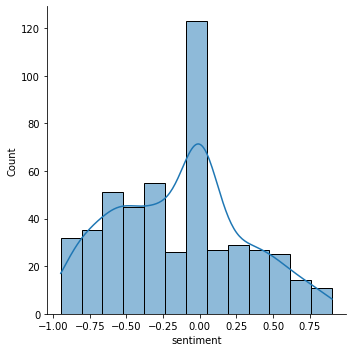

In [59]:
sns.displot(all_tweets_sample["sentiment"], kde=True)

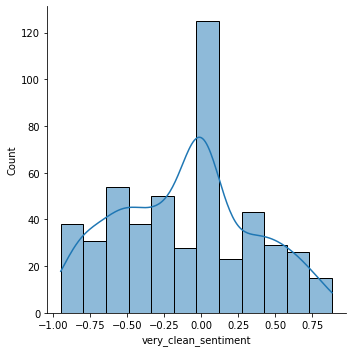

In [60]:
sns.displot(all_tweets_sample["very_clean_sentiment"], kde=True)